In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize 

import re
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("bbc-text.csv")

In [5]:
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


# Understanding Features and Target Variables

In [6]:
data['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [7]:
data.shape

(2225, 2)

In [8]:
data.dtypes

category    object
text        object
dtype: object

# Checking for NULL values

In [41]:
data.isnull().any()

category    False
text        False
dtype: bool

# Countplot of Target Variable(Category)

<AxesSubplot:xlabel='category', ylabel='count'>

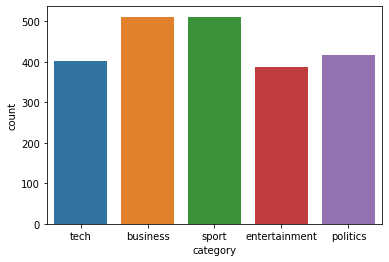

In [42]:
sns.countplot(data.category)

In [43]:
data['News_length'] = data['text'].str.len()
print(data['News_length'])

0       4333
1       1842
2       1342
3       2176
4       1579
        ... 
2220    1745
2221     955
2222    1648
2223    4684
2224    1167
Name: News_length, Length: 2225, dtype: int64


# Distribution Plot

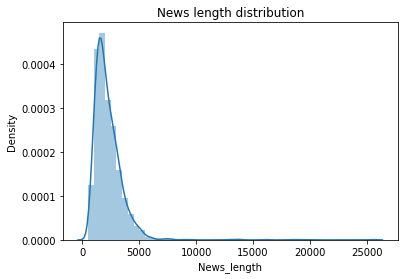

In [44]:
sns.distplot(data['News_length']).set_title('News length distribution');


# WordCloud

In [45]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

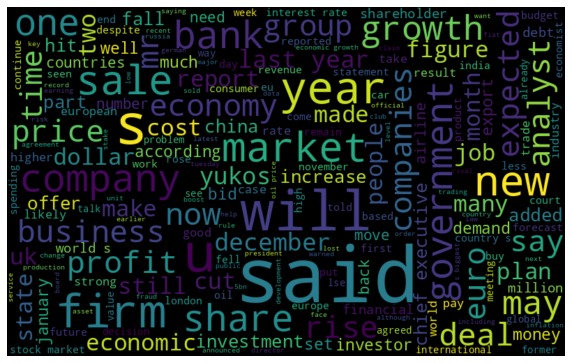

In [46]:
subset=data[data.category=="business"]
text=subset.text.values
words =" ".join(text)
create_wordcloud(words)

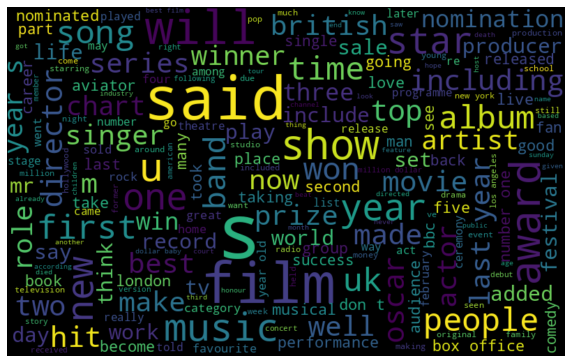

In [16]:
subset=data[data.category=="entertainment"]
text=subset.text.values
words =" ".join(text)
create_wordcloud(words)

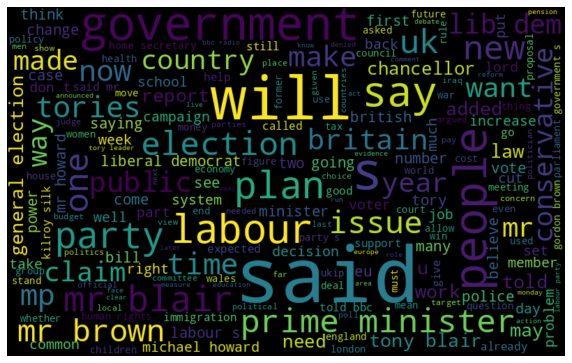

In [17]:
subset=data[data.category=="politics"]
text=subset.text.values
words =" ".join(text)
create_wordcloud(words)

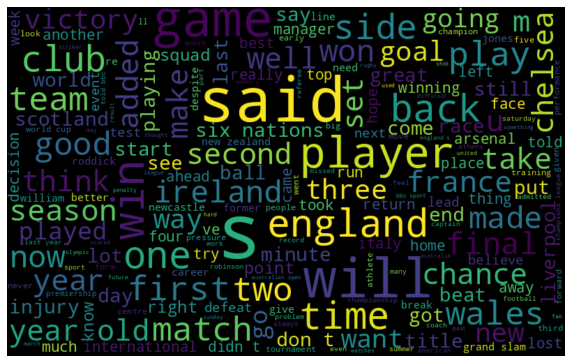

In [18]:
subset=data[data.category=="sport"]
text=subset.text.values
words =" ".join(text)
create_wordcloud(words)

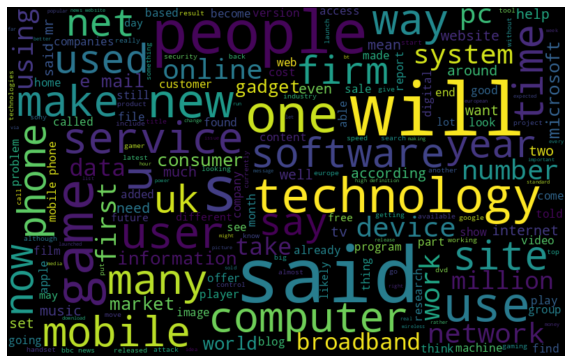

In [19]:
subset=data[data.category=="tech"]
text=subset.text.values
words =" ".join(text)
create_wordcloud(words)

# Feature Engineering

Removing the special characters<br>
1) \r<br>
2) \n<br>

Removing Punctuations and Stopwords

In [20]:
def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    
    
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    text = " ".join(filtered_sentence)
    return text

In [21]:
data['Text_parsed'] = data['text'].apply(process_text)

In [22]:
data.head()

,category,text,News_length,Text_parsed
0,tech,tv future in the hands of viewers with home th...,4333,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,1842,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,1342,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle in fa cup premiership s...,2176,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579,ocean twelve raids box office ocean twelve cri...


# Label Encoding

In [23]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['Category_target']= label_encoder.fit_transform(data['category']) 

In [24]:
data.head()

,category,text,News_length,Text_parsed,Category_target
0,tech,tv future in the hands of viewers with home th...,4333,tv future hands viewers home theatre systems p...,4
1,business,worldcom boss left books alone former worldc...,1842,worldcom boss left books alone former worldcom...,0
2,sport,tigers wary of farrell gamble leicester say ...,1342,tigers wary farrell gamble leicester say rushe...,3
3,sport,yeading face newcastle in fa cup premiership s...,2176,yeading face newcastle fa cup premiership side...,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579,ocean twelve raids box office ocean twelve cri...,1


In [25]:
data.to_csv('BBC_News_processed.csv')

# Split the data in Training and testing

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data['Text_parsed'], 
                                                    data['Category_target'], 
                                                    test_size=0.2, 
                                                    random_state=8)

In [27]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [28]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)





[[0.         0.19720545 0.         ... 0.         0.         0.        ]
 [0.         0.         0.29840098 ... 0.09158716 0.         0.12056833]
 [0.20292467 0.10688436 0.         ... 0.         0.06912208 0.19786525]
 ...
 [0.         0.12128619 0.         ... 0.         0.20467317 0.        ]
 [0.12884067 0.         0.         ... 0.         0.         0.        ]
 [0.11815315 0.         0.         ... 0.07696434 0.         0.        ]]
(445, 300)


# Building Models

# Naive Bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.946067415730337
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       105
           1       0.95      0.92      0.93        85
           2       0.96      0.96      0.96        77
           3       0.96      0.95      0.96       102
           4       0.95      0.95      0.95        76

    accuracy                           0.95       445
   macro avg       0.95      0.95      0.95       445
weighted avg       0.95      0.95      0.95       445



In [33]:
model.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

# Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9438202247191011
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       105
           1       0.94      0.93      0.93        85
           2       0.93      0.91      0.92        77
           3       0.97      0.95      0.96       102
           4       0.97      0.97      0.97        76

    accuracy                           0.94       445
   macro avg       0.95      0.94      0.94       445
weighted avg       0.94      0.94      0.94       445



In [64]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

# Hyper Paramater Tuning(Random Forest)

In [1]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

NameError: name 'model' is not defined

In [ ]:
bestF.best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1  = RandomForestClassifier(random_state=1,max_depth= 30, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
model1.fit(features_train, labels_train)
model_predictions = model1.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

# Logistic Regression

In [66]:
model = LogisticRegression()
print(model.get_params())
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy:  0.9617977528089887
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       105
           1       0.99      0.96      0.98        85
           2       0.95      0.95      0.95        77
           3       0.97      0.99      0.98       102
           4       0.97      0.96      0.97        76

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445



# Hyper Parameter Tuning (Logistic Regression)

In [67]:
param_grid = {'C': [0.1,0.001,1],
    # Create a list of options for the regularization penalty
    'penalty' : ['l1', 'l2'] }
clf = GridSearchCV(model, param_grid, cv = 3, verbose = 1)

bestF = clf.fit(features_train, labels_train)
bestF.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


{'C': 1, 'penalty': 'l2'}

In [68]:
model = LogisticRegression(C=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9617977528089887
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       105
           1       0.99      0.96      0.98        85
           2       0.95      0.95      0.95        77
           3       0.97      0.99      0.98       102
           4       0.97      0.96      0.97        76

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445



# KNeighborsClassifier

Accuracy remains the same after hyper paramter tuning

In [73]:
model = KNeighborsClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9550561797752809
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       105
           1       0.95      0.95      0.95        85
           2       0.97      0.96      0.97        77
           3       0.99      0.93      0.96       102
           4       0.95      0.97      0.96        76

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445



In [74]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

# Hyper Paramaters Tuning (KNeighborsClassifier)

In [75]:
from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}


gridF = GridSearchCV(model, params_KNN, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


In [76]:
bestF.best_params_

{'n_neighbors': 4, 'p': 2}

In [77]:
model = KNeighborsClassifier(n_neighbors=7,p=2)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.950561797752809
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       105
           1       0.92      0.95      0.94        85
           2       0.97      0.92      0.95        77
           3       0.98      0.94      0.96       102
           4       0.96      0.97      0.97        76

    accuracy                           0.95       445
   macro avg       0.95      0.95      0.95       445
weighted avg       0.95      0.95      0.95       445



# Decision Tree

In [78]:
model = DecisionTreeClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8404494382022472
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       105
           1       0.84      0.86      0.85        85
           2       0.81      0.78      0.79        77
           3       0.88      0.90      0.89       102
           4       0.89      0.83      0.86        76

    accuracy                           0.84       445
   macro avg       0.84      0.84      0.84       445
weighted avg       0.84      0.84      0.84       445



In [79]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

# Hyper Paramter Tuning (Decision Tree)

In [80]:
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

min_samples_leaf = randint(1,9)

criterion = ['gini', 'entropy']
max_depth = [3,None]



hyperF = dict(max_depth=max_depth,
                      criterion=criterion,
                      min_samples_leaf=min_samples_leaf)

model  = DecisionTreeClassifier(random_state=1)
gridF = RandomizedSearchCV(model, hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [81]:
bestF.best_params_

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3}

In [82]:
model = DecisionTreeClassifier(random_state=1,criterion= 'entropy', max_depth= None,min_samples_leaf=6)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8224719101123595
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       105
           1       0.86      0.85      0.85        85
           2       0.78      0.86      0.81        77
           3       0.89      0.87      0.88       102
           4       0.84      0.82      0.83        76

    accuracy                           0.82       445
   macro avg       0.82      0.83      0.82       445
weighted avg       0.82      0.82      0.82       445



# GaussianNB

In [83]:
model = GaussianNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9101123595505618
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       105
           1       0.93      0.81      0.87        85
           2       0.92      0.94      0.93        77
           3       0.93      0.95      0.94       102
           4       0.84      0.96      0.90        76

    accuracy                           0.91       445
   macro avg       0.91      0.91      0.91       445
weighted avg       0.91      0.91      0.91       445



# Doc2Vec

In [84]:
bbc = pd.DataFrame()

In [85]:
bbc['text'] = data['Text_parsed']

In [86]:
bbc['category'] = data['Category_target']

In [87]:
bbc.head()

,text,category
0,tv future hands viewers home theatre systems p...,4
1,worldcom boss left books alone former worldcom...,0
2,tigers wary farrell gamble leicester say rushe...,3
3,yeading face newcastle fa cup premiership side...,3
4,ocean twelve raids box office ocean twelve cri...,1


In [89]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []

    
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    
    return labeled


X_train, X_test, y_train, y_test = train_test_split(bbc.text, bbc.category, random_state=0, test_size=0.3)

X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [90]:
all_data[0:2]

[TaggedDocument(words=['apple', 'laptop', 'greatest', 'gadget', 'apple', 'powerbook', '100', 'chosen', 'greatest', 'gadget', 'time', 'us', 'magazine', 'mobile', 'pc', '1991', 'laptop', 'chosen', 'one', 'first', 'lightweight', 'portable', 'computers', 'helped', 'define', 'layout', 'future', 'notebook', 'pcs', 'magazine', 'compiled', 'alltime', 'top', '100', 'list', 'gadgets', 'includes', 'sony', 'walkman', 'number', 'three', '1956', 'zenith', 'remote', 'control', 'two', 'gadgets', 'needed', 'moving', 'parts', 'andor', 'electronics', 'warrant', 'inclusion', 'magazine', 'specified', 'gadgets', 'also', 'needed', 'selfcontained', 'apparatus', 'used', 'subset', 'another', 'device', 'general', 'included', 'items', 'potentially', 'mobile', 'said', 'magazine', 'end', 'tried', 'get', 'heart', 'really', 'makes', 'gadget', 'gadget', 'concluded', 'oldest', 'gadget', 'top', '100', 'abacus', 'magazine', 'dates', '190', 'ad', 'put', '60th', 'place', 'preelectronic', 'gadgets', 'top', '100', 'include',

In [91]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 2225/2225 [00:00<00:00, 4166217.14it/s]


In [92]:
import numpy as np
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

# Naive Bayes

# Logistic Regression

In [93]:
model = LogisticRegression(n_jobs=1, C=1e5)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.9745508982035929
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       152
           1       0.95      0.98      0.96       109
           2       0.96      0.97      0.96       113
           3       0.99      0.99      0.99       177
           4       0.97      0.97      0.97       117

    accuracy                           0.97       668
   macro avg       0.97      0.97      0.97       668
weighted avg       0.97      0.97      0.97       668



In [94]:
model = GaussianNB()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.9760479041916168
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       152
           1       0.95      0.97      0.96       109
           2       0.96      0.96      0.96       113
           3       1.00      0.99      1.00       177
           4       0.98      0.97      0.98       117

    accuracy                           0.98       668
   macro avg       0.97      0.97      0.97       668
weighted avg       0.98      0.98      0.98       668



# Random Forest

In [95]:
model = RandomForestClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.8727544910179641
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       152
           1       0.91      0.79      0.85       109
           2       0.85      0.78      0.81       113
           3       0.93      0.97      0.95       177
           4       0.91      0.81      0.86       117

    accuracy                           0.87       668
   macro avg       0.88      0.86      0.86       668
weighted avg       0.88      0.87      0.87       668



# Hyper Parameter Tuning (Random Forest)

In [96]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(train_vectors_dbow, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


KeyboardInterrupt: 

In [ ]:
bestF.best_params_

In [98]:
model = RandomForestClassifier(max_depth=15,min_samples_leaf=1,min_samples_split=2,n_estimators=1200)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.9194630872483222
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       103
           1       0.96      0.89      0.92        89
           2       0.93      0.85      0.89        81
           3       0.90      0.98      0.94        97
           4       0.99      0.87      0.92        77

    accuracy                           0.92       447
   macro avg       0.93      0.91      0.92       447
weighted avg       0.92      0.92      0.92       447



# Decision Tree

In [97]:
model = DecisionTreeClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.4745508982035928
              precision    recall  f1-score   support

           0       0.47      0.46      0.46       152
           1       0.45      0.48      0.46       109
           2       0.40      0.39      0.39       113
           3       0.52      0.53      0.53       177
           4       0.51      0.49      0.50       117

    accuracy                           0.47       668
   macro avg       0.47      0.47      0.47       668
weighted avg       0.47      0.47      0.47       668



# Hyper Parameter Tuning (Decision Tree)

In [98]:
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

min_samples_leaf = randint(1,9)

criterion = ['gini', 'entropy']
max_depth = [3,None]



hyperF = dict(max_depth=max_depth,
                      criterion=criterion,
                      min_samples_leaf=min_samples_leaf)

model  = DecisionTreeClassifier(random_state=1)
gridF = RandomizedSearchCV(model, hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(train_vectors_dbow, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [99]:
bestF.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4}

In [100]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=None,min_samples_leaf=7)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.44610778443113774
              precision    recall  f1-score   support

           0       0.48      0.50      0.49       152
           1       0.33      0.37      0.35       109
           2       0.43      0.43      0.43       113
           3       0.54      0.48      0.51       177
           4       0.41      0.41      0.41       117

    accuracy                           0.45       668
   macro avg       0.44      0.44      0.44       668
weighted avg       0.45      0.45      0.45       668



# KNeighborsClassifier

In [101]:
model = KNeighborsClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.8802395209580839
              precision    recall  f1-score   support

           0       0.98      0.81      0.89       152
           1       0.97      0.79      0.87       109
           2       0.79      0.90      0.84       113
           3       0.85      1.00      0.92       177
           4       0.86      0.85      0.86       117

    accuracy                           0.88       668
   macro avg       0.89      0.87      0.88       668
weighted avg       0.89      0.88      0.88       668



# Hyper Parameter Tuning (KNeighborsClassifier)

In [102]:
from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}


gridF = GridSearchCV(model, params_KNN, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(train_vectors_dbow, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


In [103]:
bestF.best_params_

{'n_neighbors': 7, 'p': 2}

In [104]:
model = KNeighborsClassifier(n_neighbors=6,p=2)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.8907185628742516
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       152
           1       0.97      0.79      0.87       109
           2       0.83      0.88      0.85       113
           3       0.85      0.99      0.91       177
           4       0.88      0.90      0.89       117

    accuracy                           0.89       668
   macro avg       0.90      0.88      0.89       668
weighted avg       0.90      0.89      0.89       668

